
# Project Planning Stage(Individual)


In [1]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url<- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url)

head(players_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


## 1. Data Description

This dataset contains information about a Minecraft research server, and the data is collected by analyzing player gameplay, speech, and key presses. The dataset has 196 rows and 9 columns. This means there are 196 observations and 9 variables in the dataset. Each row represents a single player. Out of the 9 variables, 4 are characters, 2 are numerical, and 3 are logical.

#### Summary Statistics

In [3]:
players_data|>
summarize(across(
         c(played_hours, age),
    list(
        mean= ~ round(mean(.x),2),
        max = ~ round(max(.x),2),
        min= ~ round(min(.x),2),
        sd= ~ round(sd(.x),2))))
summarize(players_data,
          sum_played_hours= sum(played_hours))

subscribe_count <- players_data|>
count(subscribe)
experience_count <- players_data|>
  count(experience)
gender_count <- players_data |>
  count(gender)
age_count <- players_data |>
  count(age)
played_hours_count <- players_data |>
  count(played_hours)


subscribe_count
experience_count
gender_count
age_count
played_hours_count

played_hours_mean,played_hours_max,played_hours_min,played_hours_sd,age_mean,age_max,age_min,age_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,223.1,0,28.36,21.28,99,8,9.71


sum_played_hours
<dbl>
1145.8


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


age,n
<dbl>,<int>
8,1
9,1
10,1
11,1
12,1
14,2
15,2
16,3
17,75


played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
0.3,5
0.4,5
0.5,4
0.6,5
0.7,3
0.8,2


#### Summary

| Variable| Type| Description| Potential Errors| Observations|
|---------|------|-----------|-----------------|--------------|
|experience|chr|Players Gaming Experience Level|none|5 categories- Amateur = most common|
|hashedEmail|chr|Players Emails|Possible duplicates- hard to tell at first glance|Anonymous|
|name|chr|Players Name|none|Likely not usefulA
|gender|chr|Players Gender|none|Most common - Men|
|played_hours|dbl|Amount of Hours played|none|Highly Fluctuates|
|age|dbl|Players Age|none|Range 8-99|
|subscribe|lgl|If Players are subscribed to a gaming newsletter|none|144 are subscribed|
|individualID|lgl|invalid|All values are N/A|Cannot be used|
|organizationName|lgl|invalid|All values are N/A|Cannot be used|

Initial Observations 
- played_hours varies a lot between players
- Age also has a wide range
- Two columns are completing missing values
- hasedEmail and name are identifiers are will not be used in the predictions

## 2. Question

The broad question I will address is 
- What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

The specific question I have formulated is
- Can total play time(played_hours) predict whether a player subscribes(subscribe) to the newsletter? 

The data will help me address this question, as played_hours shows how many hours each player plays, and the subscribe indicates whether they're subscribed to the newsletter or not.
- This makes this a classification problem.
- To wrangle this data, I will select the two columns I need and convert the variables to the appropriate types.

## 3. Exploratory Data Analysis and Visualization

In [4]:
url<- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url)

head(players_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


#### Wrangling the data

In [5]:
players_wrangle<-players_data|>
select(subscribe, played_hours)|>
mutate(subscribe=as.factor(subscribe))
head(players_wrangle)

subscribe,played_hours
<fct>,<dbl>
TRUE,30.3
TRUE,3.8
FALSE,0.0
TRUE,0.7
TRUE,0.1
TRUE,0.0


#### Mean of the quanitative variables 

In [6]:
players_data|>
  summarise(
    mean_played_hours = round(mean(played_hours), 2),
    mean_age = round(mean(age),2))

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.28


### Visualizations

1.) Distribution of Player Total Play Time

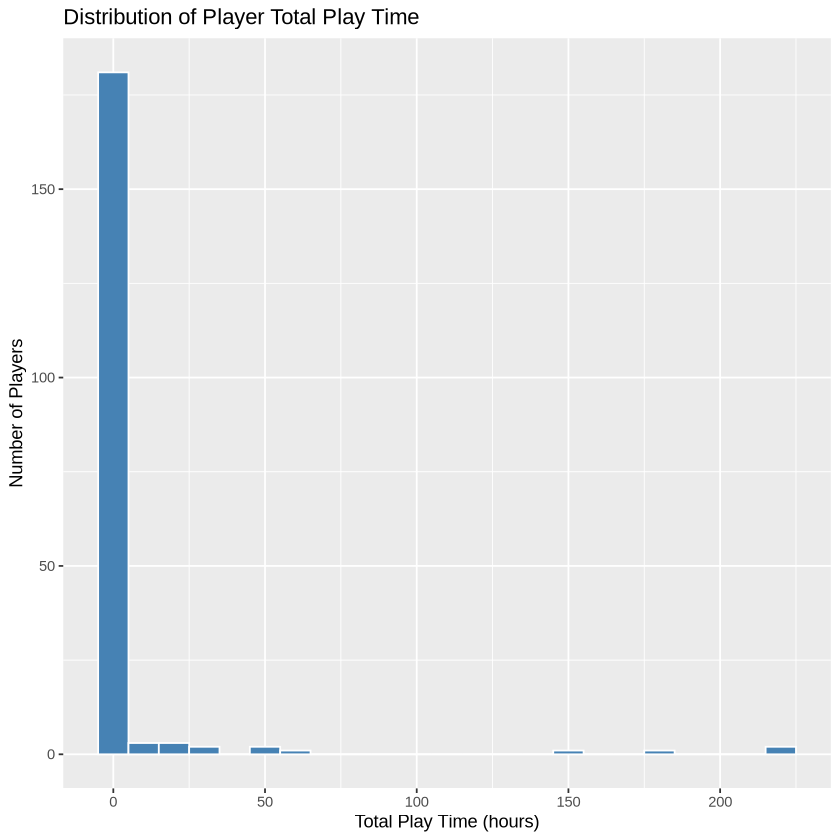

In [7]:
ggplot(players_wrangle, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Player Total Play Time",
       x = "Total Play Time (hours)",
       y = "Number of Players") 

This bar plot shows that the distribution of playtime is not very equal; in fact, it leans more to the lower end with a few extremely high values. This means most players only play a few hours, while a small number play for hundreds of hours. 

2.) Average Play Time by Subsciption Status

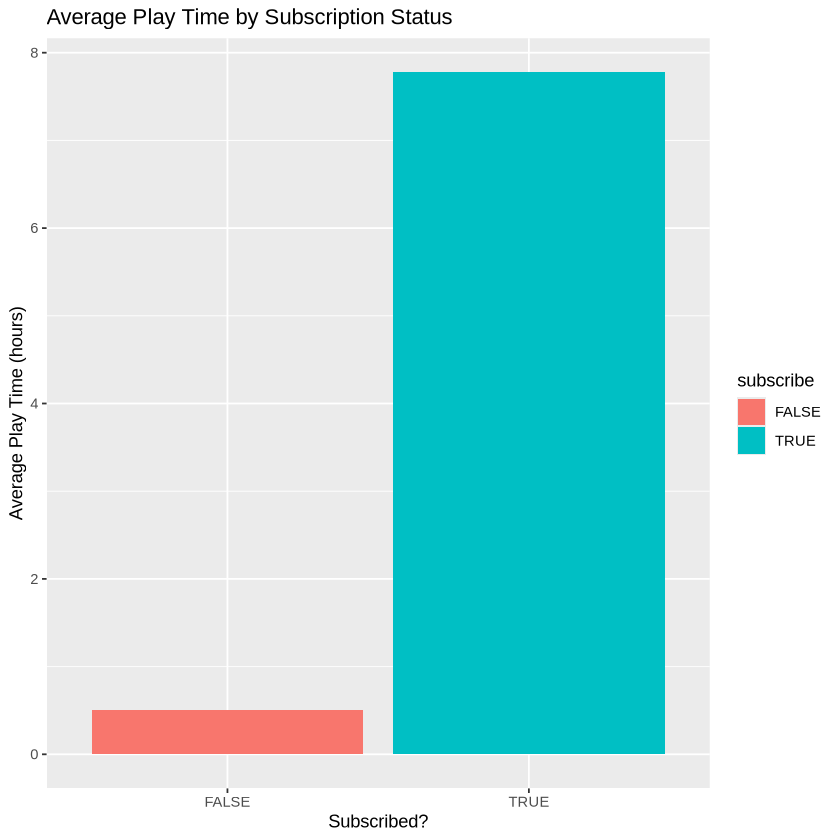

In [8]:
 players_wrangle|>
  group_by(subscribe)|>
  summarise(mean_hours = mean(played_hours )) |>
  ggplot(aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_col() +
  labs(title = "Average Play Time by Subscription Status",
       x = "Subscribed?",
       y = "Average Play Time (hours)") 


This bar plot lets us visualize whether subscribed players generally play more hours than non-subscribers. The plot shows that subscribed players do, in fact tend to play more hours on average.

3.) Relationship between Play Age and Play Time

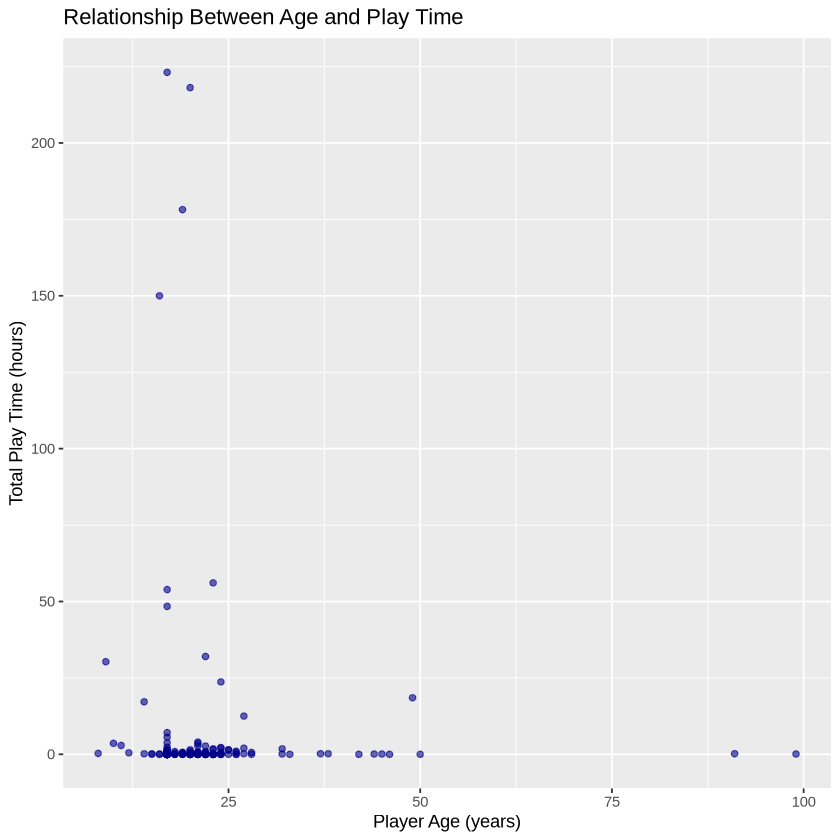

In [9]:
ggplot(players_data, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.6, color = "darkblue") +
  labs(title = "Relationship Between Age and Play Time",
       x = "Player Age (years)",
       y = "Total Play Time (hours)") 

This is just an extra relationship I wanted to visualize to see if age affects engagement. In this scatter plot, we see no strong trend, but we do see that younger players tend to play more and play the longest. 

## Methods and Plans

The goal of this analysis was to determine whether a player's total play time (played_hours) can predict whether they are subscribed (subscribe) to the newsletter or not. Since the outcome variable (subscribe) is a binary question (true/false), this analysis will use the classification method of K-NN. Players will be classified as either "Subscribed" or "Not Subscribed" based on their total playtime.

This method is appropriate because
- the response variable (subscribe) is categorical (True/False)
- the predictor variable (played_hours) is numerical and continuous.
- this method does assume a linear relationship between the two variables.

Assumptions
- the data is tidy and has no missing values
- each observation (player) is independent
- the predictors are properly scaled
- the relationship between play time and subscription is not overly random.

Limitations
- Since there is only one predictor, the model will not take into account the other factors that affect subscription (age, experience, etc.)
- Extremely high values in (played_hours) could affect classification.
- If both True and False have similar playtimes, the accuracy may be limited.
- Choice of K impacts results--> tuning will be required 

Applying the model 
- The dataset will be split 80/20 train/test before any preprocessing
- The performance will be evaluated using accuracy to show the proportion of correct predictions and cross-validation (5-fold) to improve reliability. 
  